<h1><b>Iris Dataset: Species Classification</b></h1>

In [70]:
#Importing required libraries
from sklearn.datasets import load_iris                             #load Iris dataset from scikit's library
import pandas as pd                                                #library for data manipulation and analysis
import numpy as np                                                 #library for mathematical calculation/arrays,matrices
import matplotlib.pyplot as plt                                    #plotting library
import seaborn as sns                                              #advanced plotting library than matplotlib 
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve #accuracy getting libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split  #hyperparameter tuning and data split 
from sklearn.tree import export_graphviz,DecisionTreeClassifier    #tree plotting library and tree classifier
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import pydotplus
%matplotlib inline

<h3> Load dataset and creating features/labels</h3>

In [3]:
iris = load_iris()

In [58]:
#reloading iris dataset using sns to create pairplot later in notebook
iris1 = sns.load_dataset('iris')

In [14]:
#dataframe containing features 
X = pd.DataFrame(iris.data[:,:], columns = iris.feature_names[:])

In [20]:
#label
y = pd.DataFrame(iris.target,columns=['Species'])

<h4>Display initial records of features/labels</h4>

In [17]:
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [21]:
print(y.head())

   Species
0        0
1        0
2        0
3        0
4        0


<h3> Data exploration- Find missing values/data type</h3>

In [34]:
#check if we have missing values in columns
X.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [35]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [71]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3> Plotting feature correlation and feature/label relation</h3>

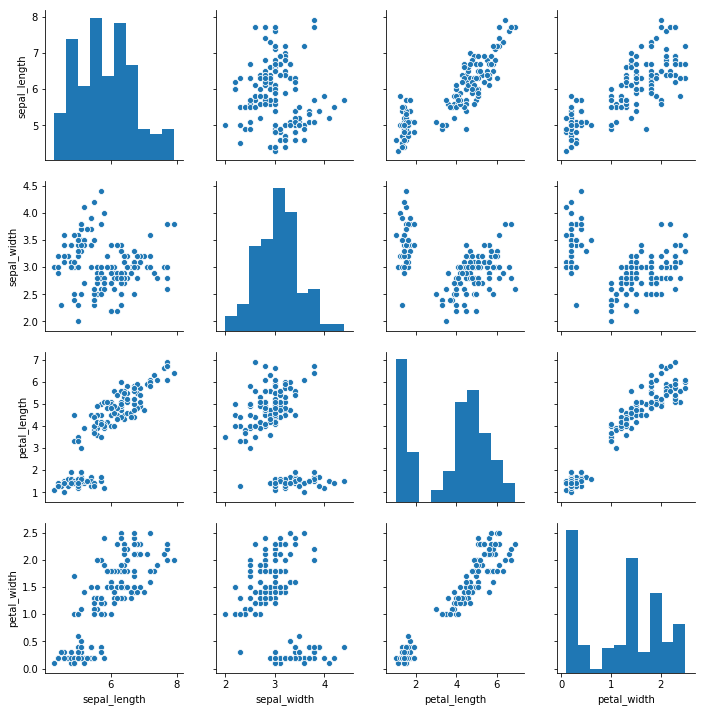

In [59]:
sns.pairplot(iris1)

C:\Users\sidsu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


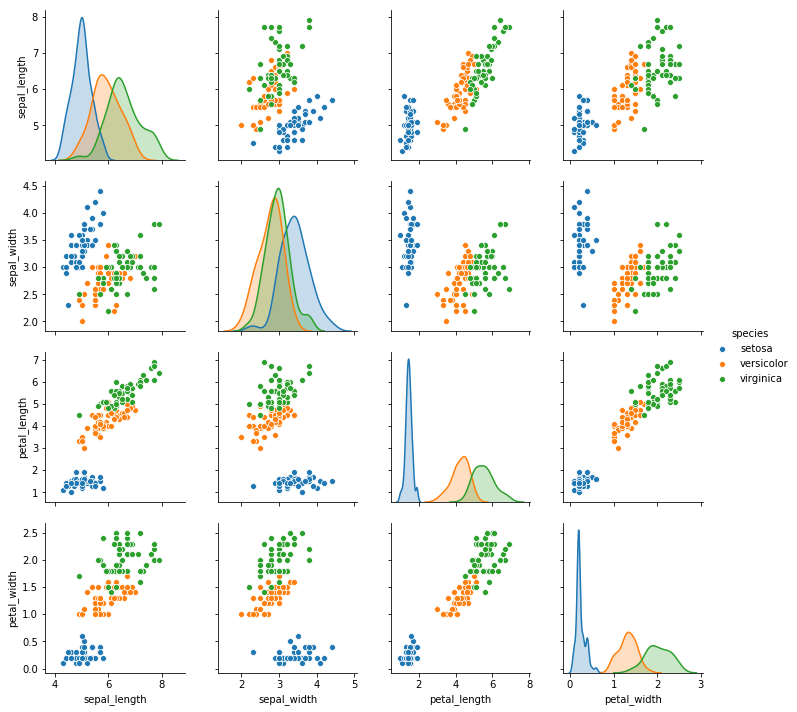

In [61]:
sns.pairplot(iris1,hue='species')

<h3> Train/Test Split </h3>

In [42]:
#splitting data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

<h3> Build ML Model</H3>

In [131]:
#create Decision tree object with max_depth 5
tree = DecisionTreeClassifier(max_depth = 5)

In [132]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<h3> Plot the decision tree model using Graphwiz</h3>

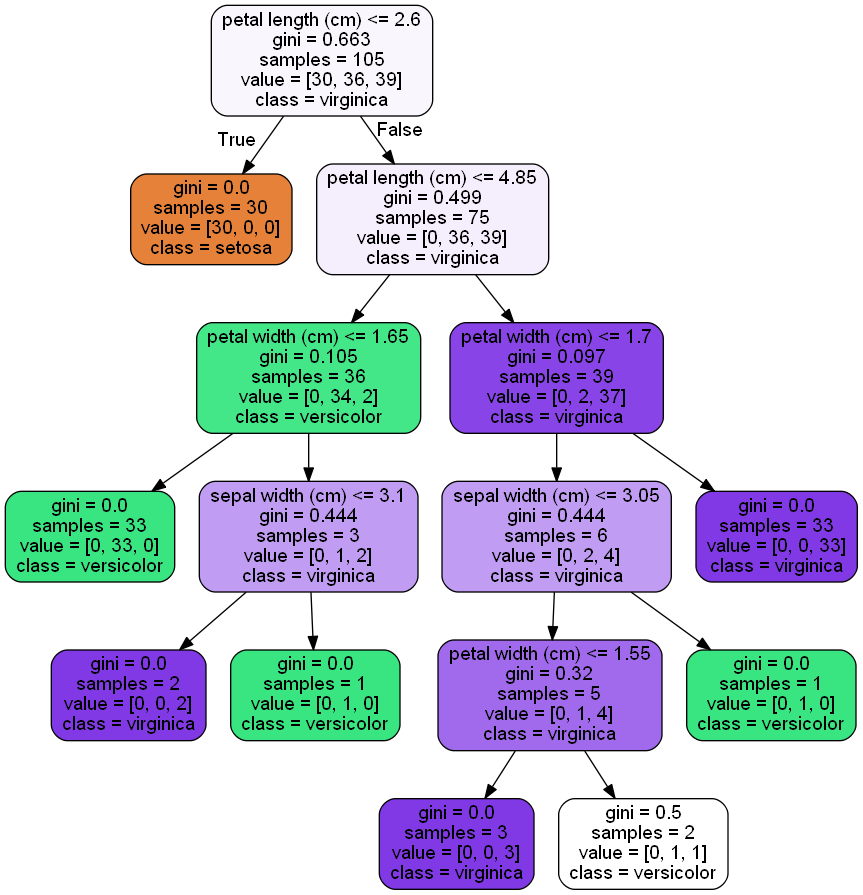

In [133]:
export_graphviz(
            tree,
            out_file =  "myTreeName.dot",
            feature_names = list(X.columns),
            class_names = iris.target_names,
            filled = True,
            rounded = True)
graph = pydotplus.graph_from_dot_file('myTreeName.dot')
Image(graph.create_png())

<h3> Make prediction and check accuracy </h3>

In [134]:
pred = tree.predict(X_test)

In [135]:
accuracy_score(y_test,pred)

0.9777777777777777

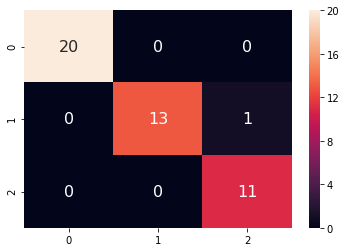



             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      0.93      0.96        14
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



In [136]:
cnf = confusion_matrix(y_test, pred)
sns.heatmap(cnf,annot=True,annot_kws={"size":16})
plt.show()

print("\n")
print(classification_report(y_test, pred))